<a href="https://colab.research.google.com/github/RENISA-GRACELIN/Online_Internship_Projects/blob/main/Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
# Define the VGG16-based model
def create_deep_learning_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    return model


In [3]:
# Define the LightGBM-based model
def create_machine_learning_model():
    model = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1,
                               n_estimators=100, objective='multiclass', num_class=num_classes)
    return model

In [4]:
# Data directories
train_dir = '/content/drive/MyDrive/DR/Train'
test_dir = '/content/drive/MyDrive/DR/Test'
valid_dir = '/content/drive/MyDrive/DR/Valid'

In [5]:
# Image dimensions
img_width, img_height = 224, 224  # Adjust according to your image dimensions
batch_size = 32
num_epochs = 20

In [6]:
# Data generators with augmentation for training and validation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

valid_datagen = ImageDataGenerator(rescale=1./255)
valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

Found 175 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


In [7]:
# Define input shape and number of classes
input_shape = (img_width, img_height, 3)  # Adjust according to your image dimensions
num_classes = 5  # Number of diabetic retinopathy stages

In [8]:
# Create the deep learning model
deep_learning_model = create_deep_learning_model(input_shape, num_classes)


In [9]:
# Compile the deep learning model
deep_learning_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [10]:
# Train the deep learning model
history = deep_learning_model.fit(train_generator,
                                  epochs=num_epochs,
                                  validation_data=valid_generator)


Epoch 1/20
6/6 [==============================] - 46s 4s/step - loss: 1.8137 - accuracy: 0.2114 - val_loss: 1.6127 - val_accuracy: 0.2000
Epoch 2/20
6/6 [==============================] - 7s 1s/step - loss: 1.6136 - accuracy: 0.2057 - val_loss: 1.6103 - val_accuracy: 0.2000
Epoch 3/20
6/6 [==============================] - 8s 1s/step - loss: 1.6115 - accuracy: 0.1829 - val_loss: 1.6096 - val_accuracy: 0.2000
Epoch 4/20
6/6 [==============================] - 9s 2s/step - loss: 1.6130 - accuracy: 0.1657 - val_loss: 1.6099 - val_accuracy: 0.2000
Epoch 5/20
6/6 [==============================] - 7s 1s/step - loss: 1.6121 - accuracy: 0.2000 - val_loss: 1.6098 - val_accuracy: 0.2000
Epoch 6/20
6/6 [==============================] - 8s 1s/step - loss: 1.6115 - accuracy: 0.2000 - val_loss: 1.6096 - val_accuracy: 0.2000
Epoch 7/20
6/6 [==============================] - 9s 2s/step - loss: 1.6123 - accuracy: 0.1943 - val_loss: 1.6096 - val_accuracy: 0.2000
Epoch 8/20
6/6 [========================

In [11]:
# Load the data
X_train = []
y_train = []
X_valid = []
y_valid = []


In [12]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [13]:
for folder in os.listdir(train_dir):
    for file in os.listdir(os.path.join(train_dir, folder)):
        img_path = os.path.join(train_dir, folder, file)
        img = plt.imread(img_path)
        img = cv2.resize(img, (img_width, img_height))
        X_train.append(img)
        y_train.append(int(folder))

In [14]:
for folder in os.listdir(valid_dir):
    for file in os.listdir(os.path.join(valid_dir, folder)):
        img_path = os.path.join(valid_dir, folder, file)
        img = plt.imread(img_path)
        img = cv2.resize(img, (img_width, img_height))
        X_valid.append(img)
        y_valid.append(int(folder))

In [15]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

# Flatten the images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_valid_flat = X_valid.reshape(X_valid.shape[0], -1)


In [16]:
import lightgbm as lgb

In [17]:
# Create the machine learning model
machine_learning_model = create_machine_learning_model()


In [18]:
# Train the machine learning model
machine_learning_model.fit(X_train_flat, y_train,
                           eval_set=[(X_valid_flat, y_valid)])


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.865263 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5756019
[LightGBM] [Info] Number of data points in the train set: 175, number of used features: 123500
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

LGBMClassifier(num_class=5, objective='multiclass')

In [19]:
# Generate predictions from the deep learning model
dl_predictions = deep_learning_model.predict(valid_generator)
dl_predictions_classes = np.argmax(dl_predictions, axis=1)


2/2 [==============================] - 1s 470ms/step


In [20]:
# Generate predictions from the machine learning model
ml_predictions = machine_learning_model.predict(X_valid_flat)


In [22]:
# Replicate the machine learning predictions to match the shape of the deep learning predictions
ml_predictions_replicated = np.repeat(ml_predictions[:, np.newaxis], dl_predictions.shape[1], axis=1)

# Combine predictions (simple averaging)
ensemble_predictions = (dl_predictions + ml_predictions_replicated) / 2
ensemble_predictions_classes = np.argmax(ensemble_predictions, axis=1)

In [23]:
# Evaluate ensemble performance
dl_accuracy = accuracy_score(valid_generator.classes, dl_predictions_classes)
ml_accuracy = accuracy_score(y_valid, ml_predictions)
ensemble_accuracy = accuracy_score(valid_generator.classes, ensemble_predictions_classes)


In [24]:
dl_precision = precision_score(valid_generator.classes, dl_predictions_classes, average='macro')
ml_precision = precision_score(y_valid, ml_predictions, average='macro')
ensemble_precision = precision_score(valid_generator.classes, ensemble_predictions_classes, average='macro')


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
dl_recall = recall_score(valid_generator.classes, dl_predictions_classes, average='macro')
ml_recall = recall_score(y_valid, ml_predictions, average='macro')
ensemble_recall = recall_score(valid_generator.classes, ensemble_predictions_classes, average='macro')

In [26]:
# Confusion matrix for deep learning model
dl_conf_matrix = confusion_matrix(valid_generator.classes, dl_predictions_classes)


In [27]:
# Confusion matrix for machine learning model
ml_conf_matrix = confusion_matrix(y_valid, ml_predictions)


In [28]:
# Confusion matrix for ensemble model
ensemble_conf_matrix = confusion_matrix(valid_generator.classes, ensemble_predictions_classes)


In [29]:
# Print confusion matrices
print("Confusion Matrix for Deep Learning Model:")
print(dl_conf_matrix)

print("\nConfusion Matrix for Machine Learning Model:")
print(ml_conf_matrix)

print("\nConfusion Matrix for Ensemble Model:")
print(ensemble_conf_matrix)

Confusion Matrix for Deep Learning Model:
[[ 0  0  0  0 10]
 [ 0  0  0  0 10]
 [ 0  0  0  0 10]
 [ 0  0  0  0 10]
 [ 0  0  0  0 10]]

Confusion Matrix for Machine Learning Model:
[[ 8  0  0  2  0]
 [ 0 10  0  0  0]
 [ 1  0  4  2  3]
 [ 1  0  0  7  2]
 [ 2  0  2  2  4]]

Confusion Matrix for Ensemble Model:
[[ 0  0  0  0 10]
 [ 0  0  0  0 10]
 [ 0  0  0  0 10]
 [ 0  0  0  0 10]
 [ 0  0  0  0 10]]


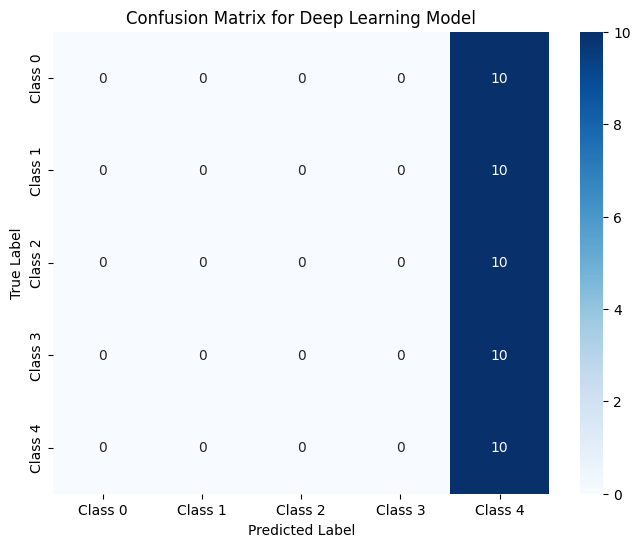

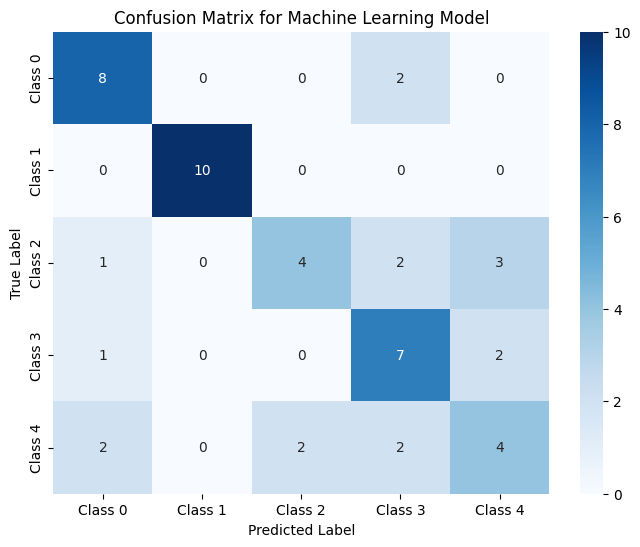

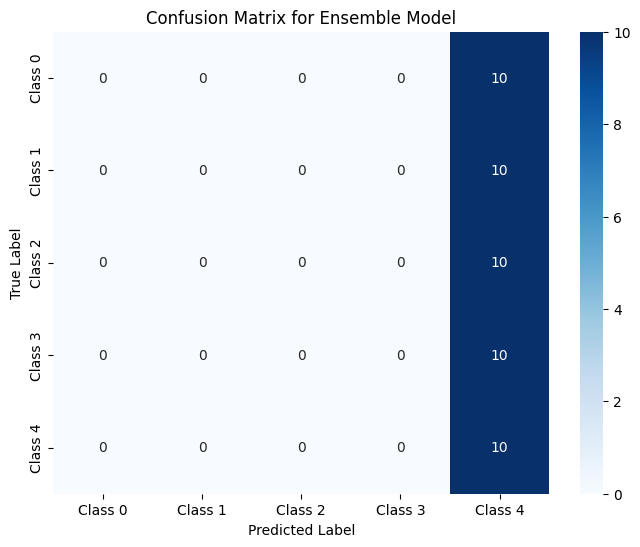

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrices
dl_conf_matrix = confusion_matrix(valid_generator.classes, dl_predictions_classes)
ml_conf_matrix = confusion_matrix(y_valid, ml_predictions)
ensemble_conf_matrix = confusion_matrix(valid_generator.classes, ensemble_predictions_classes)

# Define labels for the confusion matrices
labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']  # Adjust as per your class labels

# Plot confusion matrix for deep learning model
plt.figure(figsize=(8, 6))
sns.heatmap(dl_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for Deep Learning Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot confusion matrix for machine learning model
plt.figure(figsize=(8, 6))
sns.heatmap(ml_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for Machine Learning Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot confusion matrix for ensemble model
plt.figure(figsize=(8, 6))
sns.heatmap(ensemble_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for Ensemble Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
